In [ ]:
import pandas as pd
import pandas as pn
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving employees.csv to employees.csv
Saving nba.csv to nba.csv


In [ ]:
dfNba = pn.read_csv('nba.csv', ',')
dfEmployees = pn.read_csv('employees.csv', ',')

In [ ]:
print("Стовпці, які містять порожні дані у \"Employees\"")
print(dfEmployees.columns[dfEmployees.isna().any()])
dfEmployees = dfEmployees.dropna()

Стовпці, які містять порожні дані у "Employees"
Index(['First Name', 'Gender', 'Senior Management', 'Team'], dtype='object')


In [ ]:
print("Стовпці, які містять порожні дані у \"nba\"")
print(dfNba.columns[dfNba.isna().any()])
dfNba = dfNba.dropna()

Стовпці, які містять порожні дані у "nba"
Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')


In [ ]:
print("Вага після трансформації")
dfNba['Weight'] = dfNba['Weight'].transform(lambda x: x * 0.45359237)
print(dfNba['Weight'])

Вага після трансформації
0       81.646627
1      106.594207
3       83.914588
6      106.594207
7      107.954984
          ...    
449     93.440028
451     93.440028
452    106.140615
453     92.079251
456    104.779837
Name: Weight, Length: 364, dtype: float64


In [ ]:
print("Висота після трансформації")
def trans(x):
    x = str(x).split('-')
    return (int(x[0]) + int(x[1]) / 12) * 0.3048
    
dfNba['Height'] = dfNba['Height'].transform(trans)
print(dfNba['Height'])

Висота після трансформації
0      1.8796
1      1.9812
3      1.9558
6      2.0320
7      2.1336
        ...  
449    2.0320
451    1.9812
452    2.0828
453    1.9050
456    2.1336
Name: Height, Length: 364, dtype: float64


In [ ]:
print("Мінімальний зріст у м")
print(dfNba['Height'].min())

Мінімальний зріст у м
1.7526000000000002


In [ ]:
print("Максимальна вага у кг")
print(dfNba['Weight'].max())

Максимальна вага у кг
126.55227123


In [ ]:
print("Середня зарплата")
print(dfEmployees['Salary'].mean())

Середня зарплата
90433.19633507854


In [ ]:
print("Загальна зарплата гравців по командах")
print(dfNba['Salary'].groupby(dfNba['Team']).sum())

Загальна зарплата гравців по командах
Team
Atlanta Hawks             56383300.0
Boston Celtics            41541068.0
Brooklyn Nets             47503125.0
Charlotte Hornets         51715614.0
Chicago Bulls             73265800.0
Cleveland Cavaliers       74068189.0
Dallas Mavericks          57140305.0
Denver Nuggets            38167971.0
Detroit Pistons           67168263.0
Golden State Warriors     80535517.0
Houston Rockets           48445456.0
Indiana Pacers            48057601.0
Los Angeles Clippers      93906914.0
Los Angeles Lakers        39245338.0
Memphis Grizzlies         56862880.0
Miami Heat                65838121.0
Milwaukee Bucks           66794557.0
Minnesota Timberwolves    21310196.0
New Orleans Pelicans      68200408.0
New York Knicks           57977202.0
Oklahoma City Thunder     81515298.0
Orlando Magic             37887288.0
Philadelphia 76ers        30992894.0
Phoenix Suns              44945135.0
Portland Trail Blazers    48301818.0
Sacramento Kings          627868

In [ ]:
print("Роботодавці із значенням \"Senior Management\":\"True\"")
print(dfEmployees[dfEmployees['Senior Management'] == True])

Роботодавці із значенням "Senior Management":"True"
    First Name  Gender  Start Date  ... Bonus %  Senior Management             Team
0      Douglas    Male    8/6/1993  ...   6.945               True        Marketing
3        Jerry    Male    3/4/2005  ...   9.340               True          Finance
4        Larry    Male   1/24/1998  ...   1.389               True  Client Services
6         Ruby  Female   8/17/1987  ...  10.012               True          Product
8       Angela  Female  11/22/2005  ...  18.523               True      Engineering
..         ...     ...         ...  ...     ...                ...              ...
991       Rose  Female   8/25/2002  ...  11.051               True        Marketing
992    Anthony    Male  10/16/2011  ...  11.625               True          Finance
993       Tina  Female   5/15/1997  ...  19.040               True      Engineering
994     George    Male   6/21/2013  ...   4.479               True        Marketing
999     Albert    Male  

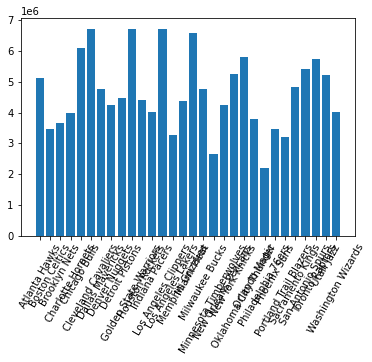

In [ ]:
df2 = dfNba[['Salary', 'Team']]
df2 = df2.groupby(dfNba['Team']).mean().reset_index()
plt.xticks(rotation=60)
plt.bar(df2['Team'], df2['Salary'])
plt.show()

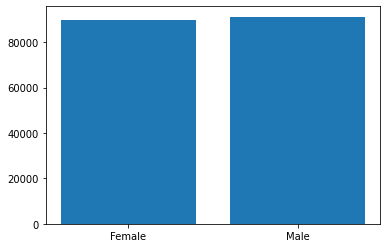

In [ ]:
df1 = dfEmployees[['Gender', 'Salary']]
df1 = df1.groupby(df1['Gender']).mean().reset_index()
plt.bar(df1['Gender'], df1['Salary'])
plt.show()
dfNba.to_csv('nbaNew.csv')
dfEmployees.to_csv('employeesNew.csv')
#files.download('nbaNew.csv')
#files.download('employeesNew.csv')